In [58]:
import dd
import numpy as np
import matplotlib.pyplot as plt
from paperlib import pedshtf as pedshtf
from scipy.optimize import curve_fit
from sklearn.isotonic import IsotonicRegression
from rpsavgperf import rpsavgperf
from ipfnpytools.isotonic_regression import isotonic_regression
from paperlib import binMeanDataYY as binMeanDataYY
from paperlib import plot4DiagPedSht as plot4DiagPedSht
from scipy.interpolate import UnivariateSpline
%load_ext autoreload
%autoreload 2
#
plt.style.use('helvet2')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Edition 6: 4.7-4.9s init 2.28m
### Edition 7: 6.9-7.1s init 2.28m

In [43]:
shotnr = 30733
p1 = pedshtf(shotnr=shotnr, exper='guimas', edition=14, nr_diags=4, elm_exper='AUGD')
p2 = pedshtf(shotnr=shotnr, exper='guimas', edition=15, nr_diags=4, elm_exper='AUGD')
p3 = pedshtf(shotnr=shotnr, exper='guimas', edition=16, nr_diags=4, elm_exper='AUGD')
p4 = pedshtf(shotnr=shotnr, exper='guimas', edition=17, nr_diags=4, elm_exper='AUGD')
p5 = pedshtf(shotnr=shotnr, exper='guimas', edition=18, nr_diags=4, elm_exper='AUGD')
pall = [p1, p2, p3, p4, p5]

In [44]:
p1.neRshift

array([ 0.   ,  0.   ,  0.   ,  0.006, -0.004,  0.   ,  0.065,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
      dtype=float32)

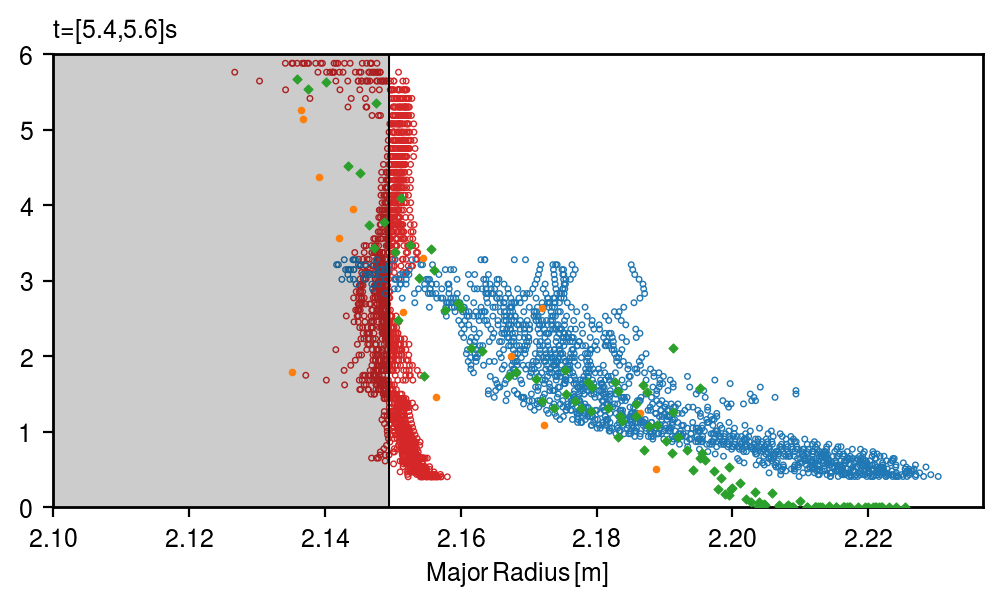

0

In [45]:
plot4DiagPedSht(p4)

In [47]:
for p in pall:
    print(p.t1)

[2.15]
[3.7]
[4.7]
[5.4]
[6.9]


In [48]:
#Discarded ranges
cuts_low = [[2.135, 2.135, 2.135, 2.135, 2.135],
             [2.12, 2.12, 2.12, 2.12, 2.12]]
cuts_hi = [[3.0, 3.0, 3.0, 3.0, 3.0],
            [3.0, 3.0, 3.0, 3.0, 3.0]]

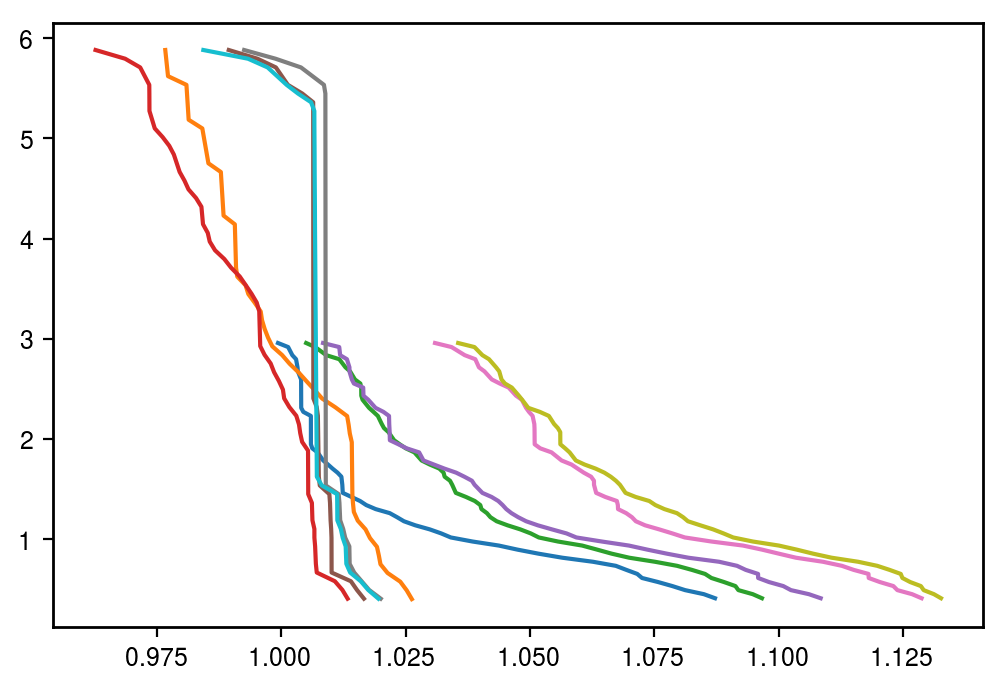

In [49]:
timeind = 0
diagind = 2

rhol = []
radl = []
dnel = []
rhoh = []
radh = []
dneh = []

plt.figure(dpi=200)

for timeind in range(5):
    for diagind in range(2,4):
        allrad = pall[timeind].rad[pall[timeind].indi[diagind]:pall[timeind].indf[diagind]]
        allrho = pall[timeind].rhos[pall[timeind].indi[diagind]:pall[timeind].indf[diagind]]
        alldne = pall[timeind].dens[pall[timeind].indi[diagind]:pall[timeind].indf[diagind]]*1e-19
        inds = (allrad>cuts_low[diagind-2][timeind])&(allrad<cuts_hi[diagind-2][timeind])
    
        nrad = allrad[inds]
        nrho = allrho[inds]
        ndne = alldne[inds]
    
        if diagind == 2:
            dind = ndne<=3.0
            rad = nrad[dind]
            rho = nrho[dind]
            dne = ndne[dind]   
        else:
            rad = nrad
            rho = nrho
            dne = ndne
        
        r, n = binMeanDataYY(rho, dne, binpts=64)
        isorho = isotonic_regression(r, strict=True)
        rr, nn = binMeanDataYY(rho, dne, binpts=64)
        isorad = isotonic_regression(rr, strict=True)
    
        if diagind == 2:#LFS
            rhol.append(isorho)
            radl.append(isorad)
            dnel.append(n)
        if diagind == 3:
            rhoh.append(isorho)
            radh.append(isorad)
            dneh.append(n)
            
        plt.plot(isorad, n)

plt.show()

In [50]:
labelstr1=r"$\mathrm{t=2.25s}$""\n"r"$\mathrm{P_{aux}=9.5MW}$""\n"r"$\mathrm{D=1.0e22e/s}$"
labelstr2=r"$\mathrm{t=3.80s}$""\n"r"$\mathrm{P_{aux}=9.5MW}$""\n"r"$\mathrm{D=4.0e22e/s}$"
labelstr3=r"$\mathrm{t=4.80s}$""\n"r"$\mathrm{P_{aux}=15MW}$""\n"r"$\mathrm{D=4.0e22e/s}$"
labelstr4=r"$\mathrm{t=5.50s}$""\n"r"$\mathrm{P_{aux}=15MW}$""\n"r"$\mathrm{D=7.0e22e/s}$"
labelstr5=r"$\mathrm{t=7.00s}$""\n"r"$\mathrm{P_{aux}=12.7MW}$""\n"r"$\mathrm{D=6.5e22e/s}$"
lblstr = [labelstr1,labelstr2,labelstr3,labelstr4,labelstr5]

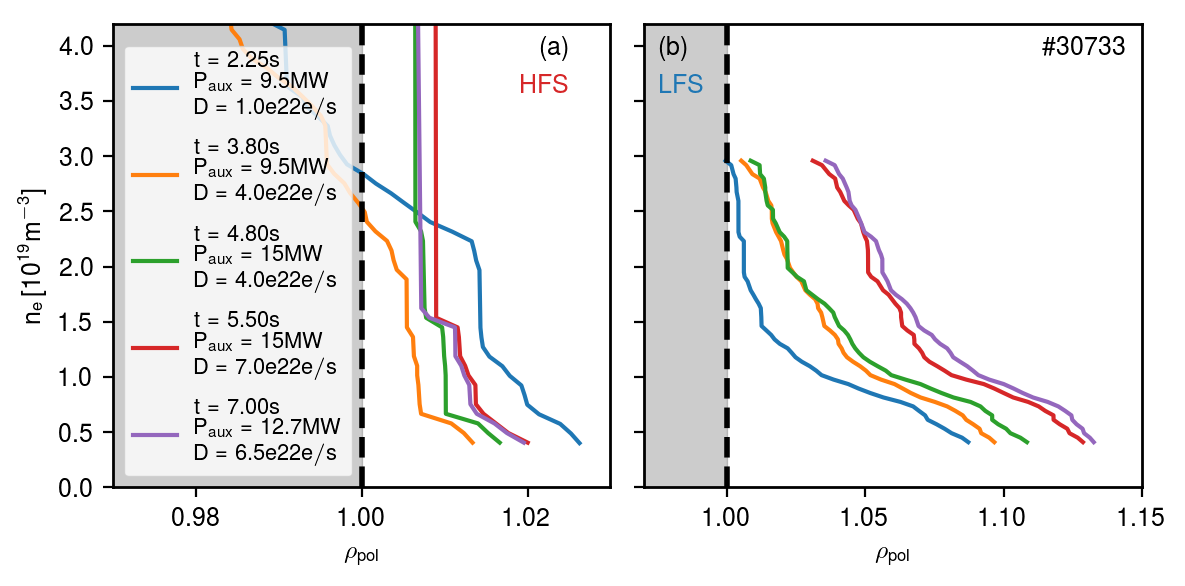

In [55]:
fig, ax = plt.subplots(figsize=(6,3),nrows=1,ncols=2,dpi=200, sharey=True)

alphaval = 0.2

ax[0].text(0.92,0.93,'(a)', ha='right', color='k', transform=ax[0].transAxes)
ax[0].text(0.92,0.85,'HFS', ha='right', color='C3', transform=ax[0].transAxes)
ax[1].text(0.03,0.93,'(b)', ha='left', color='k', transform=ax[1].transAxes)
ax[1].text(0.03,0.85,'LFS', ha='left', color='C0', transform=ax[1].transAxes)
ax[1].text(0.8,0.93,'\#30733', ha='left', color='k', transform=ax[1].transAxes)

ymax = 4.2
#ax[1].set_xlim([0.97, 1.11])
#ax[1].set_xticks([0.98,1.0,1.02,1.04,1.06,1.08,1.1])
ax[0].set_ylim(0, ymax)
ax[0].set_xlim([0.97, 1.03])

for i in range(5):
    ax[0].plot(rhoh[i], dneh[i], label=lblstr[i])
    ax[1].plot(rhol[i], dnel[i])
    
ax[0].set_ylabel(r'$\mathrm{n_{e}\,[10^{19}m^{-3}]}$')
ax[0].set_xlabel(r'$\mathrm{\rho_{pol}}$')
ax[1].set_xlabel(r'$\mathrm{\rho_{pol}}$')

ax[1].axvline(1.0, color='black', lw=2, ls='--')
ax[1].axvspan(0.9, 1., color='black', alpha=alphaval)
ax[1].set_xlim([0.97, 1.15])
ax[0].axvline(1.0, color='black', lw=2, ls='--')
ax[0].axvspan(0., 1., color='black', alpha=alphaval)

ax[0].legend(frameon=True, fontsize=7.9, loc='lower left', labelspacing=0.9)
plt.tight_layout()
#plt.savefig('./Revised/Figure5.png', dpi=300)
plt.show()

### With smooth

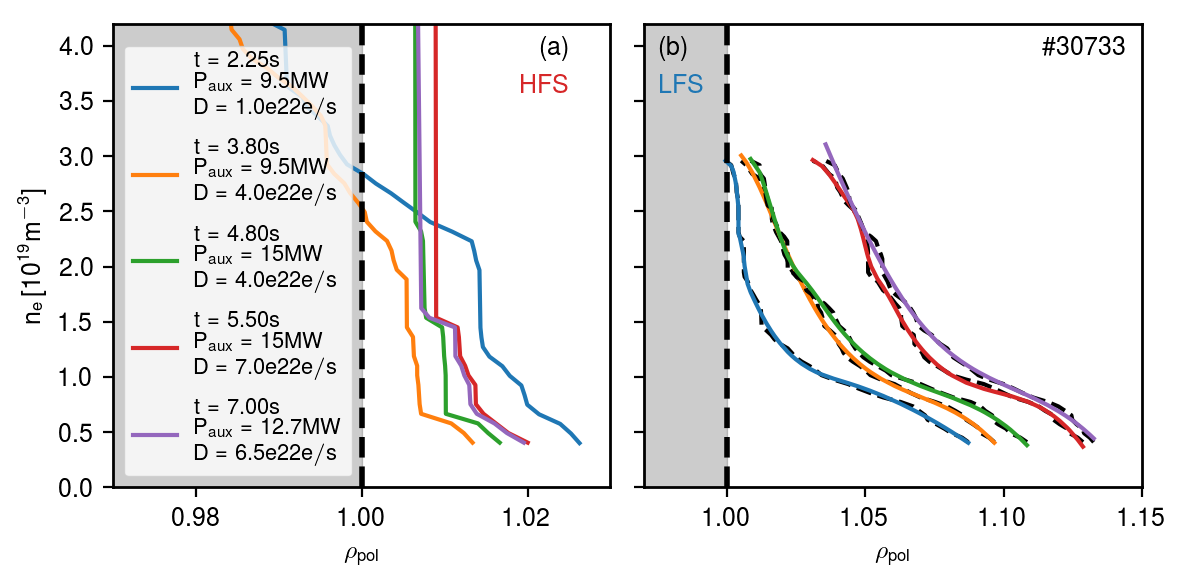

In [62]:
fig, ax = plt.subplots(figsize=(6,3),nrows=1,ncols=2,dpi=200, sharey=True)

alphaval = 0.2

ax[0].text(0.92,0.93,'(a)', ha='right', color='k', transform=ax[0].transAxes)
ax[0].text(0.92,0.85,'HFS', ha='right', color='C3', transform=ax[0].transAxes)
ax[1].text(0.03,0.93,'(b)', ha='left', color='k', transform=ax[1].transAxes)
ax[1].text(0.03,0.85,'LFS', ha='left', color='C0', transform=ax[1].transAxes)
ax[1].text(0.8,0.93,'\#30733', ha='left', color='k', transform=ax[1].transAxes)

ymax = 4.2
#ax[1].set_xlim([0.97, 1.11])
#ax[1].set_xticks([0.98,1.0,1.02,1.04,1.06,1.08,1.1])
ax[0].set_ylim(0, ymax)
ax[0].set_xlim([0.97, 1.03])

for i in range(5):
    ax[0].plot(rhoh[i], dneh[i], label=lblstr[i])
    spl = UnivariateSpline(rhol[i][::-1], dnel[i][::-1], s=0.1)
    ax[1].plot(rhol[i], dnel[i],ls='--', c='k')
    ax[1].plot(rhol[i][::-1],spl(rhol[i][::-1]))
    
ax[0].set_ylabel(r'$\mathrm{n_{e}\,[10^{19}m^{-3}]}$')
ax[0].set_xlabel(r'$\mathrm{\rho_{pol}}$')
ax[1].set_xlabel(r'$\mathrm{\rho_{pol}}$')

ax[1].axvline(1.0, color='black', lw=2, ls='--')
ax[1].axvspan(0.9, 1., color='black', alpha=alphaval)
ax[1].set_xlim([0.97, 1.15])
ax[0].axvline(1.0, color='black', lw=2, ls='--')
ax[0].axvspan(0., 1., color='black', alpha=alphaval)

ax[0].legend(frameon=True, fontsize=7.9, loc='lower left', labelspacing=0.9)
plt.tight_layout()
#plt.savefig('./Revised/Figure5.png', dpi=300)
plt.show()